In this mission, we'll be learning about the chi-squared test for categorical data. This test enables us to determine the statistical significance of observing a set of categorical values.

We'll be working with data on US income and demographics throughout this mission. Here are the first few rows of the data, in csv format:


In [1]:
import pandas as pd
income = pd.read_csv('/home/kamlesh/AnacondaProjects/Dataquest/Data/income.csv')

In [2]:
income.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,high_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
print(income.columns.tolist())

['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'high_income']


Each row represents a single person who was counted in the 1990 US Census, and contains information about their income and demographics. Here are some of the relevant columns:

    age -- how old the person is
    workclass -- the type of sector the person is employed in.
    race -- the race of the person.
    sex -- the gender of the person, either Male or Female.

The entire dataset has 32561 rows, and is a sample of the full Census. Of the rows, 10771 are Female, and 21790 are Male. These numbers look a bit off, because the full Census shows that the US is about 50% Male and 50% Female. So our expected values for number of Males and Females would be 16280.5 each.

In [7]:
income.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [8]:
income['sex'].value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

In the last screen, our observed values were 10771 Females, and 21790 Males. Our expected values were 16280.5 Females and 16280.5 Males.

    Compute the proportional difference in number of observed Females vs number of expected Females. Assign the result to female_diff.
    Compute the proportional difference in number of observed Males vs number of expected Males. Assign the result to male_diff.


In [10]:
female_diff = (10771 - 16280.5) / 16280.5
male_diff = (21790 - 16280.5) / 16280.5
print(female_diff)
print(male_diff)

-0.33841098246368356
0.33841098246368356


In the last screen, we got -0.338 for the Female difference, and 0.338 for the Male difference. These are great for finding individual differences for each category, but since both values add up to 0, they don't give us a meaningful measure of how our overall observed counts deviate from the expected counts.

No matter what value we put for observed male and female, the differnece bwtween observed and expected value 
will add upto zeros, because the total observed count for Male and Female items always comes out to 32561. If the observed count of Females is high, the count of Males has to be low to compensate, and vice versa.

So We can calculate  X^2, the chi-squared value, by adding up all of the squared differences between observed and expected values.

In [11]:
female_diff = (10771 - 16280.5) ** 2 / 16280.5
male_diff = (21790 - 16280.5) ** 2 / 16280.5
gender_chisq = female_diff + male_diff

Now that we have a chi-squared value for our observed and expected gender counts, we need a way to figure out what the chi-squared value represents. We can translate a chi-squared value into a statistical significance value using a chi-squared sampling distribution. If you recall, we covered statistical significance and p-values in the last mission. A p-value allows us to determine whether the difference between two values is due to chance, or due to an underlying difference.

We can generate a chi-squared sampling distribution using our expected probabilities. If we repeatedly generate random samples that contain 32561 samples, and graph the chi-squared value of each sample, we'll be able to generate a distribution. Here's a rough algorithm:

    Randomly generate 32561 numbers that range from 0-1.
    Based on the expected probabilities, assign Male or Female to each number.
    Compute the observed frequences of Male and Female.
    Compute the chi-squared value and save it.
    Repeat several times.
    Create a histogram of all the chi-squared values.

By comparing our chi-squared value to the distribution, and seeing what percentage of the distribution is greater than our value, we'll get a p-value. For instance, if 5% of the values in the distribution are greater than our chi-squared value, the p-value is .05.

(array([ 812.,  117.,   41.,   21.,    6.,    1.,    0.,    1.,    0.,    1.]),
 array([  3.07115875e-05,   1.59654188e+00,   3.19305304e+00,
          4.78956420e+00,   6.38607537e+00,   7.98258653e+00,
          9.57909769e+00,   1.11756089e+01,   1.27721200e+01,
          1.43686312e+01,   1.59651423e+01]),
 <a list of 10 Patch objects>)

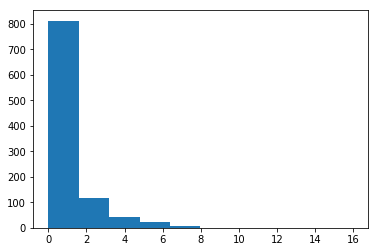

In [13]:
chi_squared_values = []
from numpy.random import random
import matplotlib.pyplot as plt
%matplotlib inline
for i in range(1000):
    sequence = random((32561,))
    sequence[sequence < .5] = 0
    sequence[sequence >= .5] = 1
    male_count = len(sequence[sequence == 0])
    female_count = len(sequence[sequence == 1])
    male_diff = (male_count - 16280.5) ** 2 / 16280.5
    female_diff = (female_count - 16280.5) ** 2 / 16280.5
    chi_squared = male_diff + female_diff
    chi_squared_values.append(chi_squared)

plt.hist(chi_squared_values)

In the last screen, our calculated chi-squared value is greater than all the values in the distribution, so our p-value is 0, indicating that our result is statistically significant. You may recall from the last mission that .05 is the typical threshold for statistical significance, and anything below it is considered significant.

A significant value indicates that something is different between the observed and expected values, but it doesn't indicate what is different.

Now that we have a chi-squared sampling distribution, we can compare the chi-squared value we calculated for our data to it to see if our result is statistically significant. The chi-squared value we calculated was 3728.95. The highest value in the chi-squared sampling distribution was about 12. This means that our chi-squared value is higher than 100% of all the values in the sampling distribution, so we get a p-value of 0. This means that there is a 0% chance that we could get such a result randomly.

This would indicate that we need to investigate our data collection techniques more closely to figure out why such a result occurred.

Because a chi-squared value has no sign (all chi-squared values are positive), it doesn't tell us anything about the direction of the statistical significance. If we had 10771 Females, and 21790 Males, or 10771 Males, and 21790 Females, we'd get the same chi-squared value. It's important to look at the data and see how the data is unbalanced after calculating a chi-squared value and getting a significant result.

### Significance testing